<a href="https://colab.research.google.com/github/Harshitt-10/Colab/blob/main/KNN_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [3]:
np.random.seed(42)

In [4]:
class_0 = np.random.randn(50, 2) + np.array([3, 3])
class_1 = np.random.randn(50, 2) + np.array([4, 4])

In [5]:
X = np.vstack((class_0, class_1))
y = np.array([0]*50 + [1]*50)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [9]:
def knn_predict(X_train, y_train, x_test, k=3):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

In [10]:
y_pred = np.array([knn_predict(X_train, y_train, x, k=3) for x in X_test])

In [11]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred)*100)

Accuracy with k=5 80.0


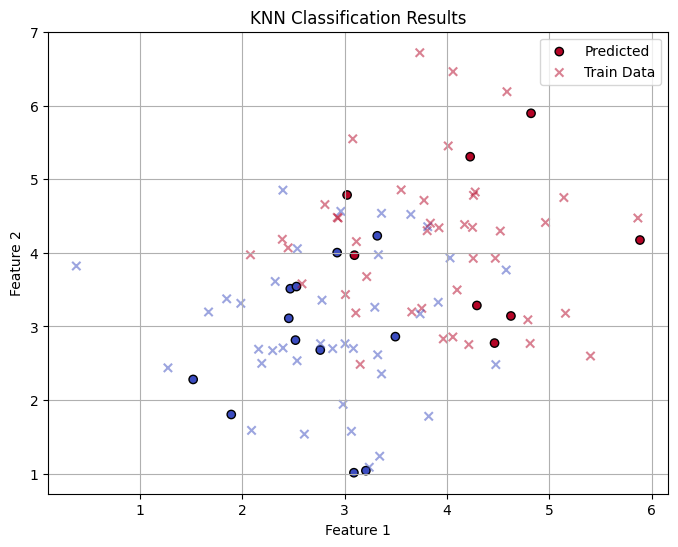

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', label='Predicted')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='x', alpha=0.5, label='Train Data')
plt.title('KNN Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()